In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [157]:
x_train = pd.read_csv("csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv("csvTrainLabel 13440x1.csv",header=None)

x_test = pd.read_csv("csvTestImages 3360x1024.csv",header=None)
y_test = pd.read_csv("csvTestLabel 3360x1.csv",header=None)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13440, 1024)
(13440, 1)
(3360, 1024)
(3360, 1)


In [159]:
x_train  = x_train.iloc[:,:].values
x_test   = x_test.iloc[:,:].values

y_train  = y_train.iloc[:,:].values
y_test   = y_test.iloc[:,:].values

In [160]:
y_train[11]

array([2], dtype=int64)

In [161]:
print("Labels: ", np.unique(y_train))

Labels:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]


In [162]:
x_train = x_train.reshape(-1,32,32)
x_test = x_test.reshape(-1,32,32)
x_train = x_train/255
x_test = x_test/255
print(x_train.shape)
print(x_test.shape)

(13440, 32, 32)
(3360, 32, 32)


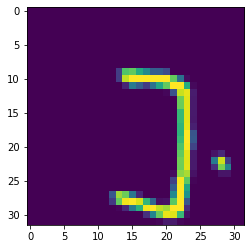

In [163]:
import matplotlib.pyplot as plt
plt.imshow(x_train[11])

In [164]:
nbr_classes=len(np.unique(y_train))+1
print(nbr_classes)
y_train = to_categorical(y_train, nbr_classes)
y_test = to_categorical(y_test, nbr_classes)
print(y_train.shape, y_test.shape)

29
(13440, 29) (3360, 29)


In [165]:
x_train = x_train.reshape([-1, 32, 32, 1])
x_test = x_test.reshape([-1, 32, 32, 1])

In [166]:
print(x_train.shape, x_test.shape)


(13440, 32, 32, 1) (3360, 32, 32, 1)


In [168]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(nbr_classes, activation='softmax')
   ])

In [169]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          7

In [170]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [171]:
image_generator = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
image_generator.fit(x_train)

In [172]:
batch_size = 128

history = model.fit_generator(image_generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=100, verbose=2,
                    validation_data=(x_test, y_test),
                    validation_steps=x_test.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 105 steps, validate on 3360 samples
Epoch 1/100
105/105 - 14s - loss: 2.5780 - accuracy: 0.1949 - val_loss: 1.6035 - val_accuracy: 0.4023
Epoch 2/100
105/105 - 15s - loss: 1.3792 - accuracy: 0.5052 - val_loss: 1.0641 - val_accuracy: 0.5998
Epoch 3/100
105/105 - 15s - loss: 1.0298 - accuracy: 0.6254 - val_loss: 0.7362 - val_accuracy: 0.7353
Epoch 4/100
105/105 - 13s - loss: 0.8391 - accuracy: 0.6967 - val_loss: 0.7053 - val_accuracy: 0.7371
Epoch 5/100
105/105 - 13s - loss: 0.6914 - accuracy: 0.7526 - val_loss: 0.5198 - val_accuracy: 0.8110
Epoch 6/100
105/105 - 13s - loss: 0.6096 - accuracy: 0.7827 - val_loss: 0.4510 - val_accuracy: 0.8428
Epoch 7/100
105/105 - 13s - loss: 0.5414 - accuracy: 0.8100 - val_loss: 0.4283 - val_accuracy: 0.8531
Epoch 8/100
105/105 - 14s - loss: 0.4835 - accuracy: 0.8333 - val_loss: 0.3723 - val_accuracy: 0.8744
Epoch 9/100
105/105 - 13s - loss: 0.4

In [173]:
model.evaluate(x_test, y_test)

3360/3360 [==============================] - 2s 566us/sample - loss: 0.1583 - accuracy: 0.9634


[0.1582731046107559, 0.96339285]

In [174]:
model.save("arabic_character_recognition.h5")